In [11]:
# change current directory to parent folder
import os
import sys

if not os.path.isdir("pypsa-earth"):
    os.chdir("../../..")
sys.path.append(os.getcwd()+"/pypsa-earth/scripts")



from _helpers import three_2_two_digits_country

ModuleNotFoundError: No module named '_helpers'

In [4]:
# import packages

import logging
import os

import pypsa
import yaml
import pandas as pd
import geopandas as gpd
import numpy as np
import scipy as sp
import networkx as nx
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.io.img_tiles import OSM
import cartopy.feature as cfeature

from scipy.sparse import csgraph
from itertools import product
import re

from shapely.geometry import Point, LineString
import shapely, shapely.prepared
from shapely.wkt import loads
from shapely.validation import make_valid

logger = logging.getLogger(__name__)

pd.set_option("display.max_columns", None)
pd.set_option("display.max_colwidth", 70)

c:\Users\marih\anaconda3\envs\pypsa-earth-test\lib\site-packages\pypsa\networkclustering.py:16: UserWarning: The namespace `pypsa.networkclustering` is deprecated and will be removed in PyPSA v0.24. Please use `pypsa.clustering.spatial instead`. 
  warnings.warn(


c:\Users\marih\anaconda3\envs\pypsa-earth-test\lib\site-packages\pypsa\components.py:318: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  attrs.loc[bool_b, "default"] = attrs.loc[bool_b].isin({True, "True"})
c:\Users\marih\anaconda3\envs\pypsa-earth-test\lib\site-packages\pypsa\components.py:318: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  attrs.loc[bool_b, "default"] = attrs.loc[bool_b].isin({True, "True"})
c:\Users\marih\anaconda3\envs\pypsa-earth-test\lib\site-packages\pypsa\components.py:318: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[]' has dtype incompatible with float64, pleas

(<matplotlib.collections.PatchCollection at 0x247db86e170>,
 <matplotlib.collections.LineCollection at 0x247dc9d6e30>)

c:\Users\marih\anaconda3\envs\pypsa-earth-test\lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


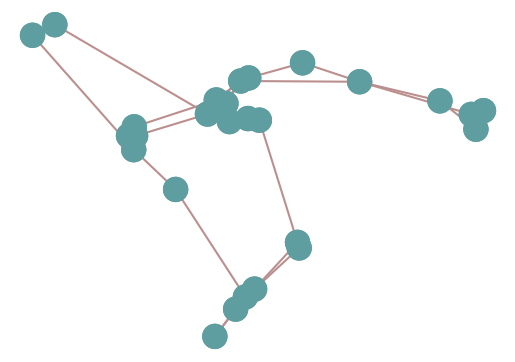

In [13]:
path_27_nodes = "c:/Users/marih/test4/pypsa-earth/results/networks/elec_s_27_ec_lcopt_Co2L-1H.nc"

network_full = pypsa.Network(path_27_nodes)
network_full.plot()

In [14]:
network_full.buses

,bus_id,v_nom,tag_substation,tag_area,lon,lat,country,x,y,control,generator,carrier,type,unit,v_mag_pu_set,v_mag_pu_min,v_mag_pu_max,sub_network
Bus,,,,,,,,,,,,,,,,,,
3,3,220.0,transmission,97760.0,-67.0430,-17.9673,BO,-67.0430,-17.9673,PQ,,AC,,,1.0,0.0,inf,
5,5,220.0,transmission,20790.0,-65.7984,-19.6082,BO,-65.7984,-19.6082,PQ,,AC,,,1.0,0.0,inf,
6,6,220.0,transmission,20820.0,-63.6306,-17.4234,BO,-63.6306,-17.4234,PQ,,AC,,,1.0,0.0,inf,
9,9,220.0,transmission,41170.0,-63.2299,-17.7394,BO,-63.2299,-17.7394,PQ,,AC,,,1.0,0.0,inf,
10,10,220.0,transmission,13550.0,-66.2210,-17.5704,BO,-66.2210,-17.5704,Slack,10 onwind,AC,,,1.0,0.0,inf,
21,21,220.0,transmission,39140.0,-67.0374,-17.7129,BO,-67.0374,-17.7129,PQ,,AC,,,1.0,0.0,inf,
27,27,220.0,transmission,0.0,-67.1006,-17.8132,BO,-67.1006,-17.8132,PQ,,AC,,,1.0,0.0,inf,
29,29,220.0,transmission,15830.0,-65.6962,-19.5209,BO,-65.6962,-19.5209,PQ,,AC,,,1.0,0.0,inf,
32,32,220.0,transmission,57920.0,-63.1459,-17.5326,BO,-63.1459,-17.5326,PQ,,AC,,,1.0,0.0,inf,
